### ***Package used for project***

In [1]:
# data processing
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt

### ***Create Object Oriented Progamming***



In [5]:
class RSIInvestment:
    def __init__(self, data, budget, period=14):
        self.data = data
        self.budget = budget
        self.period = period
        self.signals = None
        self.profit = 0

    def calculate_rsi(self):
        delta = self.data['Close'].diff()
        gain = delta.where(delta > 0, 0)
        loss = -delta.where(delta < 0, 0)
        
        avg_gain = gain.rolling(window=self.period, min_periods=1).mean()
        avg_loss = loss.rolling(window=self.period, min_periods=1).mean()

        rs = avg_gain / avg_loss
        rsi = 100 - (100 / (1 + rs))

        self.data['RSI'] = rsi

    def generate_signals(self):
        self.data['Signal'] = 0
        self.data.loc[self.data['RSI'] < 30, 'Signal'] = 1
        self.data.loc[self.data['RSI'] > 70, 'Signal'] = -1

    def calculate_profit(self):
        position = 0
        self.profit = 0
        for i in range(len(self.data)):
            if self.data['Signal'][i] == 1 and position == 0:
                position = self.budget // self.data['Close'][i]
                self.budget -= position * self.data['Close'][i]
            elif self.data['Signal'][i] == -1 and position > 0:
                self.budget += position * self.data['Close'][i]
                self.profit += (self.data['Close'][i] - self.data['Close'][i-1]) * position
                position = 0

        change_rate = (self.profit / (self.budget + self.profit)) * 100
        return self.profit, change_rate

    def plot_data(self):
        plt.figure(figsize=(12,8))
        plt.plot(self.data['Close'], label='Close Price')
        plt.plot(self.data['RSI'], label='RSI')
        plt.axhline(30, linestyle='--', alpha=0.5, color='r')
        plt.axhline(70, linestyle='--', alpha=0.5, color='r')
        plt.scatter(self.data.index, self.data['Signal'], label='Signals', color='black')
        plt.legend()
        plt.show()

    def print_trade_signals(self):
        buy_signals = self.data[self.data['Signal'] == 1]
        sell_signals = self.data[self.data['Signal'] == -1]

        print("Buy Signals:")
        for date, row in buy_signals.iterrows():
            print(f"Date: {date}, Price: {row['Close']}")

        print("\nSell Signals:")
        for date, row in sell_signals.iterrows():
            print(f"Date: {date}, Price: {row['Close']}")        

### ***Import data***

In [ ]:
data = pd.read_csv("OIL_5m.csv")
data.shape

### ***TEST RUN***

C:\Users\MSI\AppData\Local\Temp\ipykernel_6484\1836216179.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if self.data['Signal'][i] == 1 and position == 0:
C:\Users\MSI\AppData\Local\Temp\ipykernel_6484\1836216179.py:34: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif self.data['Signal'][i] == -1 and position > 0:
C:\Users\MSI\AppData\Local\Temp\ipykernel_6484\1836216179.py:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p

Total profit: 786.7975234985352
Change rate: 91.84%


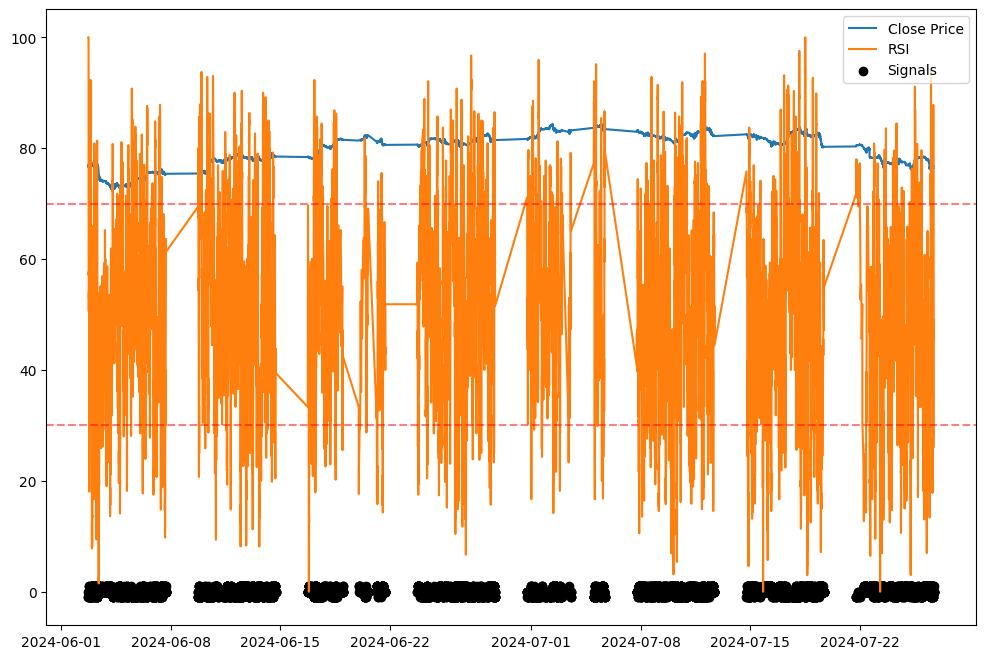

Buy Signals:
Date: 2024-06-02 19:25:00-04:00, Price: 76.62000274658203
Date: 2024-06-02 19:30:00-04:00, Price: 76.63999938964844
Date: 2024-06-02 23:10:00-04:00, Price: 77.2699966430664
Date: 2024-06-02 23:15:00-04:00, Price: 77.20999908447266
Date: 2024-06-02 23:20:00-04:00, Price: 77.06999969482422
Date: 2024-06-02 23:25:00-04:00, Price: 76.93000030517578
Date: 2024-06-02 23:30:00-04:00, Price: 76.95999908447266
Date: 2024-06-02 23:35:00-04:00, Price: 76.97000122070312
Date: 2024-06-02 23:40:00-04:00, Price: 76.9800033569336
Date: 2024-06-02 23:45:00-04:00, Price: 76.9800033569336
Date: 2024-06-02 23:50:00-04:00, Price: 76.97000122070312
Date: 2024-06-02 23:55:00-04:00, Price: 76.94999694824219
Date: 2024-06-03 00:00:00-04:00, Price: 76.97000122070312
Date: 2024-06-03 00:05:00-04:00, Price: 76.97000122070312
Date: 2024-06-03 00:10:00-04:00, Price: 76.93000030517578
Date: 2024-06-03 00:15:00-04:00, Price: 76.91999816894531
Date: 2024-06-03 00:20:00-04:00, Price: 76.93000030517578
Date

In [6]:
if __name__ == "__main__":
    data = pd.read_csv("OIL_5m.csv", parse_dates=['Datetime'], index_col='Datetime')
    
    rsi_investment = RSIInvestment(data=data, budget=10000)
    rsi_investment.calculate_rsi()
    rsi_investment.generate_signals()
    profit, change_rate = rsi_investment.calculate_profit()
    print(f"Total profit: {profit}")
    print(f"Change rate: {change_rate:.2f}%")
    rsi_investment.plot_data()
    rsi_investment.print_trade_signals()